In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-attrition-data/IBM Attrition Data.csv


In [2]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices

In [3]:
#reading the IBM Attrition Data
ibm_hr_data = pd.read_csv('../input/ibm-attrition-data/IBM Attrition Data.csv', sep=",", header=0)

In [4]:
ibm_hr_data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [5]:
ibm_hr_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [6]:
ibm_hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [7]:
name = ibm_hr_data.columns.values
name

array(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'], dtype=object)

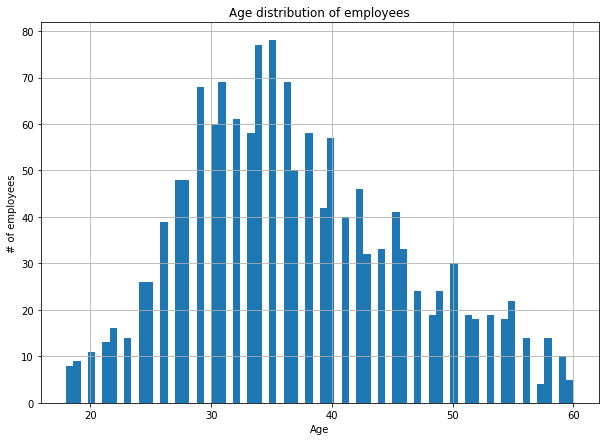

In [8]:
# Age of employee
plt.figure(figsize=(10,7))
ibm_hr_data['Age'].hist(bins=70)
plt.title("Age distribution of employees")
plt.xlabel('Age')
plt.ylabel('# of employees')
plt.show()

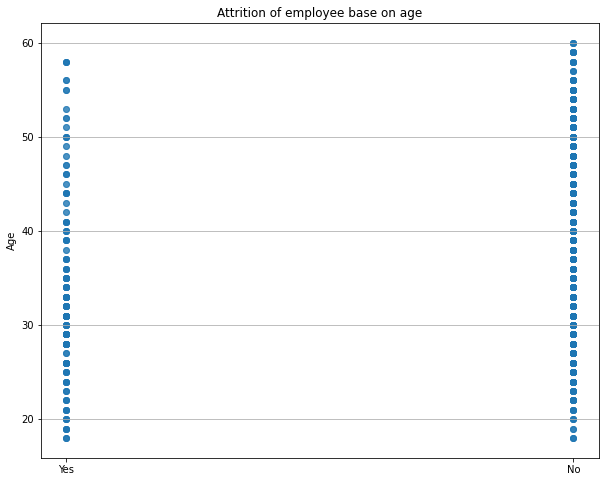

In [9]:
#Attrition: Employee attrition age
plt.figure(figsize=(10, 8))
plt.scatter(ibm_hr_data.Attrition, ibm_hr_data.Age, alpha=.55)
plt.title('Attrition of employee base on age')
plt.ylabel("Age")
plt.grid(visible=True, which='major',axis='y')
plt.show()

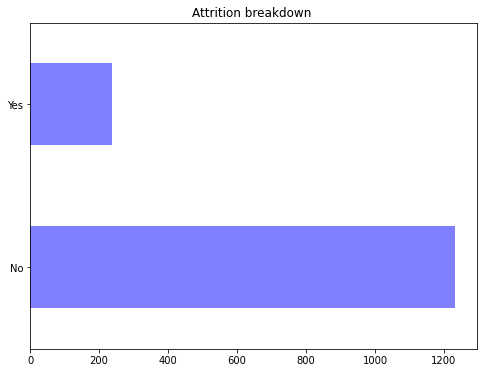

In [10]:
# Exploring the attrition some more
plt.figure(figsize=(8,6))
ibm_hr_data.Attrition.value_counts().plot(kind='barh', color='blue', alpha=.50)
plt.title("Attrition breakdown ")
plt.show()

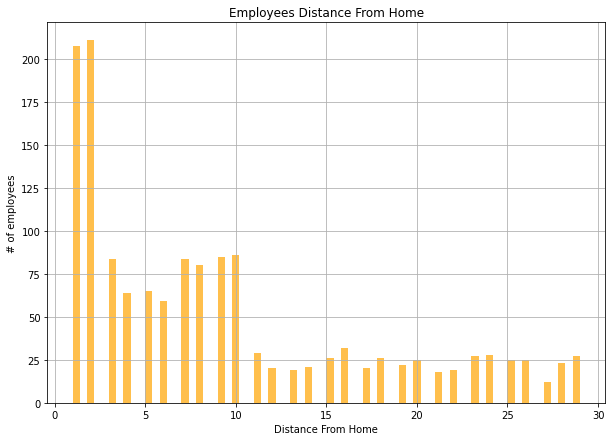

In [11]:
# Exploring the Distance from home
plt.figure(figsize=(10,7))
ibm_hr_data['DistanceFromHome'].hist(bins=70, color="orange", alpha=.70)
plt.title("Employees Distance From Home")
plt.xlabel('Distance From Home')
plt.ylabel('# of employees')
plt.show()

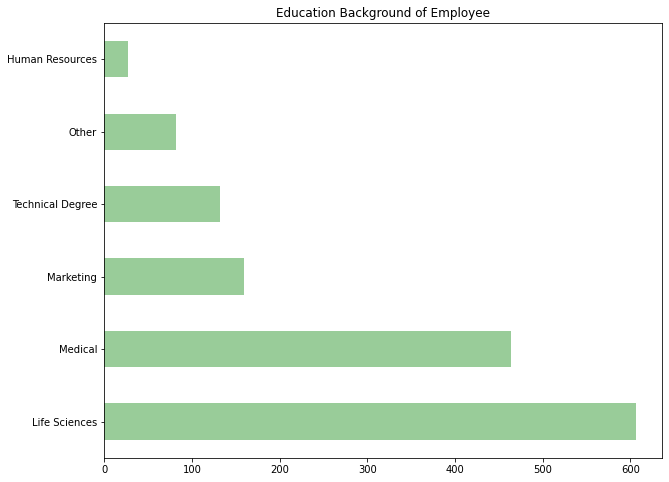

In [12]:
#exploring data from the Education distribution
plt.figure(figsize=(10,8))
ibm_hr_data.EducationField.value_counts().plot(kind="barh", color="green", alpha=.40)
plt.title("Education Background of Employee")
plt.show()

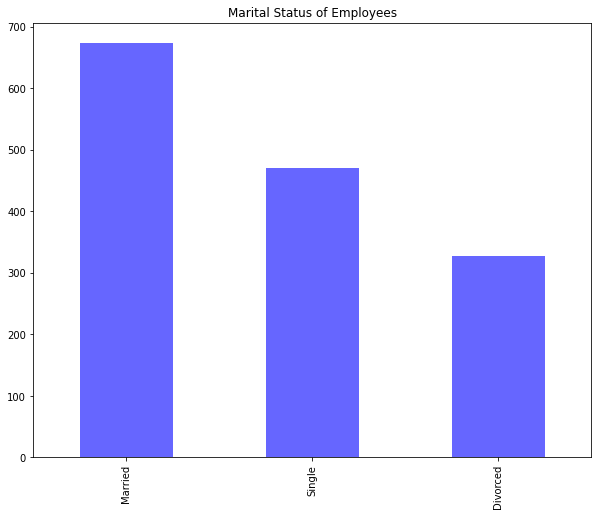

In [13]:
# Exploring Marital Status rating of employee
plt.figure(figsize=(10,8))
ibm_hr_data.MaritalStatus.value_counts().plot(kind='bar', alpha=.60, color='blue')
plt.title("Marital Status of Employees")
plt.show()

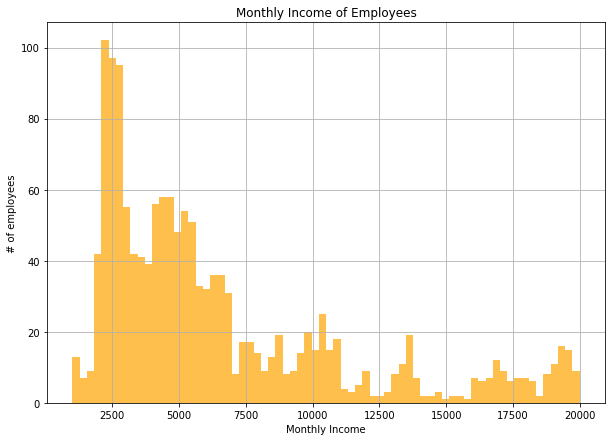

In [14]:
# Exploring the Distance from home
plt.figure(figsize=(10,7))
ibm_hr_data['MonthlyIncome'].hist(bins=70, color="orange", alpha=.70)
plt.title("Monthly Income of Employees")
plt.xlabel('Monthly Income')
plt.ylabel('# of employees')
plt.show()

In [15]:
ibm_hr_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [16]:
ibm_hr_data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

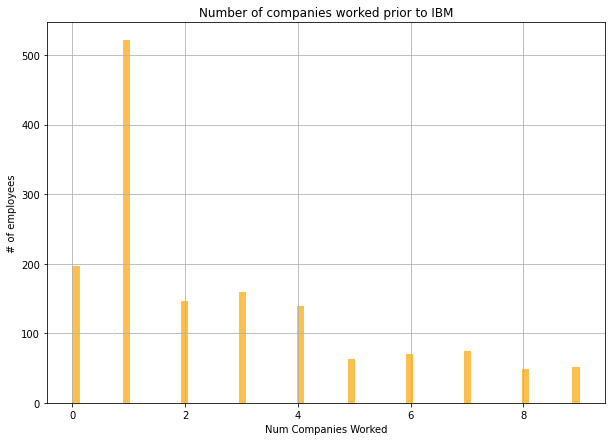

In [17]:
# Exploring the Number of companies worked prior to IBM
plt.figure(figsize=(10,7))
ibm_hr_data['NumCompaniesWorked'].hist(bins=70, color="orange", alpha=.70)
plt.title("Number of companies worked prior to IBM")
plt.xlabel('Num Companies Worked')
plt.ylabel('# of employees')
plt.show()

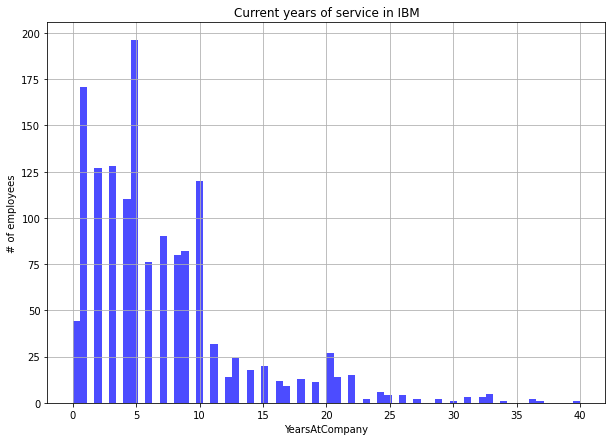

In [18]:
# Exploring the Current years of service in IBM
plt.figure(figsize=(10,7))
ibm_hr_data['YearsAtCompany'].hist(bins=70, color="blue", alpha=.70)
plt.title("Current years of service in IBM")
plt.xlabel('YearsAtCompany')
plt.ylabel('# of employees')
plt.show()

In [19]:
ibm_hr_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [20]:
ibm_hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [21]:
ibm_hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [22]:
#Replacing the Attrition description with  number representation
ibm_hr_data['Attrition'].replace('Yes',1, inplace=True)
ibm_hr_data['Attrition'].replace('No',0, inplace=True)

In [23]:
ibm_hr_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [24]:
# building up a logistic regression model
X = ibm_hr_data.drop(['Attrition'],axis=1)
X.head()
Y = ibm_hr_data['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [25]:
# Replacing the EducationField descriptions with number representation 
ibm_hr_data['EducationField'].replace('Life Sciences',1, inplace=True)
ibm_hr_data['EducationField'].replace('Medical',2, inplace=True)
ibm_hr_data['EducationField'].replace('Marketing', 3, inplace=True)
ibm_hr_data['EducationField'].replace('Other',4, inplace=True)
ibm_hr_data['EducationField'].replace('Technical Degree',5, inplace=True)
ibm_hr_data['EducationField'].replace('Human Resources', 6, inplace=True)

In [26]:
ibm_hr_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,1,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,1,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,4,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,1,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,2,1,2,Married,3468,9,3,2


In [27]:
ibm_hr_data['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [28]:
ibm_hr_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [29]:
# Replacing the EducationField descriptions with number representation
ibm_hr_data['Department'].replace('Research & Development',1, inplace=True)
ibm_hr_data['Department'].replace('Sales',2, inplace=True)
ibm_hr_data['Department'].replace('Human Resources', 3, inplace=True)

In [30]:
ibm_hr_data['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [31]:
ibm_hr_data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [32]:
ibm_hr_data['MaritalStatus'].replace('Married',1, inplace=True)
ibm_hr_data['MaritalStatus'].replace('Single',2, inplace=True)
ibm_hr_data['MaritalStatus'].replace('Divorced',3, inplace=True)

In [33]:
ibm_hr_data['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [34]:
x=ibm_hr_data.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [35]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [36]:
y=ibm_hr_data['Attrition']

In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [38]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  ibm_hr_data, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [39]:
y=np.ravel(y)

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [41]:
y.mean()

0.16122448979591836

In [42]:
import sklearn
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [43]:
#predicting the test model
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [44]:
#predict_probs to return the class probilities of the dataset
probs = model2.predict_proba(X_test)
print (probs)

[[0.86179629 0.13820371]
 [0.80754595 0.19245405]
 [0.74123953 0.25876047]
 [0.83441331 0.16558669]
 [0.73499944 0.26500056]
 [0.7909775  0.2090225 ]
 [0.85615202 0.14384798]
 [0.85699674 0.14300326]
 [0.96699053 0.03300947]
 [0.93685203 0.06314797]
 [0.95099268 0.04900732]
 [0.83101544 0.16898456]
 [0.86296552 0.13703448]
 [0.86581192 0.13418808]
 [0.88750595 0.11249405]
 [0.88892618 0.11107382]
 [0.88569719 0.11430281]
 [0.78516588 0.21483412]
 [0.79794491 0.20205509]
 [0.88511296 0.11488704]
 [0.7065161  0.2934839 ]
 [0.94676686 0.05323314]
 [0.86736256 0.13263744]
 [0.84276457 0.15723543]
 [0.60336877 0.39663123]
 [0.81129201 0.18870799]
 [0.91813724 0.08186276]
 [0.93285519 0.06714481]
 [0.68230779 0.31769221]
 [0.87027131 0.12972869]
 [0.87266382 0.12733618]
 [0.76968745 0.23031255]
 [0.8643576  0.1356424 ]
 [0.95758874 0.04241126]
 [0.84461482 0.15538518]
 [0.86719352 0.13280648]
 [0.90465972 0.09534028]
 [0.68936434 0.31063566]
 [0.90703612 0.09296388]
 [0.80663482 0.19336518]


In [45]:

from sklearn import metrics

print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.6502502887947632


In [46]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [47]:
print(X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [48]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571905e-07 9.99999374e-01]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
